In [1]:
import glob
import re
import pandas as pd

In [2]:
def load_hogar_ccaa_data(
    path_pattern: str = '../../datamarts/picotaData_supercategory/hogarCCAA*.tsv',
    sort_by_ccaa: bool = True,
    ccaa_column_name: str = 'ccaa'
) -> pd.DataFrame:
    """
    Lee todos los ficheros TSV de hogares por CCAA, añade una columna con el código
    de CCAA extraído del nombre de fichero, concatena todo en un único DataFrame y
    opcionalmente ordena por CCAA.

    Parameters
    ----------
    path_pattern : str
        Patrón glob para localizar los archivos (por defecto '../../datamarts/picotaData/hogarCCAA*.tsv').
    sort_by_ccaa : bool
        Si True, ordena el DataFrame resultante por la columna de CCAA.
    ccaa_column_name : str
        Nombre de la columna donde se almacenará el código de CCAA.

    Returns
    -------
    pd.DataFrame
        DataFrame con todos los datos concatenados y la columna de CCAA.
    """
    files = glob.glob(path_pattern)
    dfs = []

    for fp in files:
        m = re.search(r'hogarCCAA(\d+)\.tsv$', fp)
        if not m:
            continue
        code = m.group(1).zfill(2)  # si quieres siempre dos dígitos, ojo

        df = pd.read_csv(fp, sep='\t')
        df[ccaa_column_name] = code
        dfs.append(df)

    if not dfs:
        raise FileNotFoundError(f"No se encontraron archivos con patrón {path_pattern}")

    big_df = pd.concat(dfs, ignore_index=True)

    if sort_by_ccaa:
        big_df.sort_values(ccaa_column_name, inplace=True)

    return big_df



In [3]:
df = load_hogar_ccaa_data()
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
df.head()

,timestamp,capitalProvincia,tamanoMunicipio,densidad,superficie,aguaCaliente,calefaccion,zonaResidencial,regimenTenencia,comidasTotales,miembros:ocupados,miembros:noOcupados,miembros:activos,miembros:noActivos,miembros:ancianos:masculinos,miembros:ancianos:femeninos,miembros:adultos:masculinos,miembros:adultos:femeninos,miembros:niños:femeninos,miembros:niños:masculinos,miembros:conIngresos:masculinos,miembros:conIngresos:femeninos,miembros:sinIngresos:masculinos,miembros:sinIngresos:femeninos,edadSp,espanolSp,educacionSuperiorSp,fuentePrincipalIngresos,numeroViviendasAdicionales,ingresosNetos,gastoNoMonetario,tasaAhorro,temperaturaMedia,tasaParo,inflacion,tipoInteres,tasaCambioEurUsd,ipc,gastoMonetario:alimentosYBebidasNoAlcoholicas1,gastoMonetario:bebidasAlcoholicasYTabaco2,gastoMonetario:ropaYCalzado3,gastoMonetario:viviendaAguaElectricidadGasOtrosCombustibles4,gastoMonetario:mobiliarioEquipamientoDelHogarYGastosDeConservacion5,gastoMonetario:salud6,gastoMonetario:transportes7,gastoMonetario:comunicaciones8,gastoMonetario:ocioEspectaculosYCultura9,gastoMonetario:ensenanza10,gastoMonetario:hotelesCafesYRestaurantes11,gastoMonetario:otrosBienesYServicios12,ccaa
0,2006-01-01T00:00:00,0,3,1,90.0,1,0,5,6,68.0,3.0,2,3.0,2,0,0,0,2,1,2,2,1,0,2,47,1,0,asalariado,0.0,25097.315845,2766.339719,97.252121,19.62,12.6,2.9,3.50,1.26,81.547750,1124.040435,265.262879,1442.416574,1005.294153,212.142395,415.723961,2245.277830,909.167244,343.328969,1.502660,514.162656,655.022605,01
6476,2015-01-01T00:00:00,1,5,3,150.0,1,0,5,2,78.0,1.0,2,2.0,1,0,0,1,1,1,0,1,1,0,1,53,1,1,asalariado,1.0,22603.679682,6743.792711,99.151170,19.62,31.5,0.0,0.05,1.11,93.537667,1190.991367,1173.091856,5160.877668,6617.641431,1650.831277,581.849156,2015.724885,493.099470,2853.648813,453.717259,1683.277222,2754.461855,01
6477,2015-01-01T00:00:00,0,5,3,85.0,1,0,5,6,112.0,1.0,3,2.0,2,0,0,1,1,0,2,0,1,3,0,43,1,1,asalariado,0.0,12011.903077,3223.982952,99.399983,19.62,31.5,0.0,0.05,1.11,93.537667,5983.967521,161.769499,1239.873961,1369.953601,1864.852884,793.257335,2818.301800,424.262784,3038.930939,8.218324,496.197778,1819.693191,01
6478,2015-01-01T00:00:00,1,5,3,75.0,1,0,5,5,72.0,1.0,2,2.0,1,0,0,1,1,1,0,1,1,0,1,61,1,0,pension,0.0,11834.387268,3456.019125,99.063053,19.62,31.5,0.0,0.05,1.11,93.537667,4317.069419,1219.533608,521.000681,1145.026278,913.236654,79.117810,555.221784,452.525601,600.669119,2.054581,1671.204504,1154.123963,01
6479,2015-01-01T00:00:00,0,3,1,90.0,1,1,5,6,110.0,1.0,3,2.0,2,0,0,1,1,0,2,1,1,2,0,49,1,0,pension,0.0,13017.825995,606.742461,99.316898,19.62,31.5,0.0,0.05,1.11,93.537667,2844.789459,79.298613,345.564108,4016.582821,2223.163613,18.154279,5501.099865,1219.410333,117.850773,752.099966,1345.462994,593.445212,01


Convertimos en dummies las variables categoricas

In [4]:
df = pd.get_dummies(df, columns=['ccaa', 'fuentePrincipalIngresos'], prefix=['ccaa', 'fuentePrincipalIngresos'])

# Renombrar las columnas de CCAA para que tengan un formato más amigable
df.rename(columns=lambda x: re.sub(r'^ccaa_(\d+)$', r'ccaa_\1', x), inplace=True)
# Renombrar las columnas de fuentePrincipalIngresos para que tengan un formato más amigable
df.rename(columns=lambda x: re.sub(r'^fuentePrincipalIngresos_(\d+)$', r'fuentePrincipalIngresos_\1', x), inplace=True)


In [5]:
df.head(
)

,timestamp,capitalProvincia,tamanoMunicipio,densidad,superficie,aguaCaliente,calefaccion,zonaResidencial,regimenTenencia,comidasTotales,miembros:ocupados,miembros:noOcupados,miembros:activos,miembros:noActivos,miembros:ancianos:masculinos,miembros:ancianos:femeninos,miembros:adultos:masculinos,miembros:adultos:femeninos,miembros:niños:femeninos,miembros:niños:masculinos,miembros:conIngresos:masculinos,miembros:conIngresos:femeninos,miembros:sinIngresos:masculinos,miembros:sinIngresos:femeninos,edadSp,espanolSp,educacionSuperiorSp,numeroViviendasAdicionales,ingresosNetos,gastoNoMonetario,tasaAhorro,temperaturaMedia,tasaParo,inflacion,tipoInteres,tasaCambioEurUsd,ipc,gastoMonetario:alimentosYBebidasNoAlcoholicas1,gastoMonetario:bebidasAlcoholicasYTabaco2,gastoMonetario:ropaYCalzado3,gastoMonetario:viviendaAguaElectricidadGasOtrosCombustibles4,gastoMonetario:mobiliarioEquipamientoDelHogarYGastosDeConservacion5,gastoMonetario:salud6,gastoMonetario:transportes7,gastoMonetario:comunicaciones8,gastoMonetario:ocioEspectaculosYCultura9,gastoMonetario:ensenanza10,gastoMonetario:hotelesCafesYRestaurantes11,gastoMonetario:otrosBienesYServicios12,ccaa_01,ccaa_02,ccaa_03,ccaa_04,ccaa_05,ccaa_06,ccaa_07,ccaa_08,ccaa_09,ccaa_10,ccaa_11,ccaa_12,ccaa_13,ccaa_14,ccaa_15,ccaa_16,ccaa_17,ccaa_18,ccaa_19,fuentePrincipalIngresos_asalariado,fuentePrincipalIngresos_autonomYRenta,fuentePrincipalIngresos_pension
0,2006-01-01T00:00:00,0,3,1,90.0,1,0,5,6,68.0,3.0,2,3.0,2,0,0,0,2,1,2,2,1,0,2,47,1,0,0.0,25097.315845,2766.339719,97.252121,19.62,12.6,2.9,3.50,1.26,81.547750,1124.040435,265.262879,1442.416574,1005.294153,212.142395,415.723961,2245.277830,909.167244,343.328969,1.502660,514.162656,655.022605,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6476,2015-01-01T00:00:00,1,5,3,150.0,1,0,5,2,78.0,1.0,2,2.0,1,0,0,1,1,1,0,1,1,0,1,53,1,1,1.0,22603.679682,6743.792711,99.151170,19.62,31.5,0.0,0.05,1.11,93.537667,1190.991367,1173.091856,5160.877668,6617.641431,1650.831277,581.849156,2015.724885,493.099470,2853.648813,453.717259,1683.277222,2754.461855,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6477,2015-01-01T00:00:00,0,5,3,85.0,1,0,5,6,112.0,1.0,3,2.0,2,0,0,1,1,0,2,0,1,3,0,43,1,1,0.0,12011.903077,3223.982952,99.399983,19.62,31.5,0.0,0.05,1.11,93.537667,5983.967521,161.769499,1239.873961,1369.953601,1864.852884,793.257335,2818.301800,424.262784,3038.930939,8.218324,496.197778,1819.693191,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6478,2015-01-01T00:00:00,1,5,3,75.0,1,0,5,5,72.0,1.0,2,2.0,1,0,0,1,1,1,0,1,1,0,1,61,1,0,0.0,11834.387268,3456.019125,99.063053,19.62,31.5,0.0,0.05,1.11,93.537667,4317.069419,1219.533608,521.000681,1145.026278,913.236654,79.117810,555.221784,452.525601,600.669119,2.054581,1671.204504,1154.123963,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6479,2015-01-01T00:00:00,0,3,1,90.0,1,1,5,6,110.0,1.0,3,2.0,2,0,0,1,1,0,2,1,1,2,0,49,1,0,0.0,13017.825995,606.742461,99.316898,19.62,31.5,0.0,0.05,1.11,93.537667,2844.789459,79.298613,345.564108,4016.582821,2223.163613,18.154279,5501.099865,1219.410333,117.850773,752.099966,1345.462994,593.445212,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [6]:
output_columns = [col for col in df.columns if col.startswith("gastoMonetario:")]


## Analísis de sensibilidad no lineal por código

### 🗂 Categorías por código (Super_Categoría)

| Código | Grupo de Gasto |
|--------|----------------|
| 1 | Alimentos y bebidas no alcohólicas |
| 2 | Bebidas alcohólicas, tabaco y narcóticos |
| 3 | Artículos de vestir y calzado |
| 4 | Vivienda, agua, electricidad, gas y otros combustibles |
| 5 | Mobiliario, equipamiento del hogar y gastos de conservación |
| 6 | Salud |
| 7 | Transportes |
| 8 | Comunicaciones |
| 9 | Ocio, espectáculos y cultura |
| 10 | Enseñanza |
| 11 | Hoteles, cafés y restaurantes |
| 12 | Otros bienes y servicios |



## MLP

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [8]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def train_mlp_per_category(df, output_columns, hidden_layer_sizes=(128, 64, 32), max_iter=500, top_n=10):
    r2_results = []
    mse_results = []
    all_importances = []

    excluded = output_columns + ["timestamp"]
    input_features = [col for col in df.select_dtypes(include="number").columns if col not in excluded]

    for target in output_columns:
        print(f"\n🔧 Training MLP for {target}...")

        df_clean = df.dropna(subset=[target] + input_features)
        if df_clean.shape[0] < len(input_features) + 10:
            print("❌ Not enough data. Skipping.")
            continue

        X = df_clean[input_features]
        y = df_clean[target]

        # Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalize
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # MLP model
        mlp = MLPRegressor(
            hidden_layer_sizes=hidden_layer_sizes,
            activation='relu',
            solver='adam',
            early_stopping=True,
            n_iter_no_change=10,
            validation_fraction=0.1,
            max_iter=max_iter,
            random_state=42
        )
        mlp.fit(X_train, y_train)

        # Predict & evaluate
        y_pred = mlp.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print(f"✅ R² for {target}: {r2:.4f}, MSE: {mse:.4f}")

        # Permutation importance
        print("🔍 Calculating permutation importances...")
        result = permutation_importance(mlp, X_test, y_test, n_repeats=5, random_state=42, n_jobs=1)
        importances_df = pd.DataFrame({
            "Variable": df_clean[input_features].columns,
            "Importance": result.importances_mean,
            "Target": target
        }).sort_values(by="Importance", ascending=False)

        # Show top variables
        print(f"📊 Top {top_n} variables by importance for {target}:")
        print(importances_df.head(top_n).to_string(index=False))

        # Save results
        r2_results.append({"Target": target, "R2": r2})
        mse_results.append({"Target": target, "MSE": mse})
        all_importances.append(importances_df)

    r2_df = pd.DataFrame(r2_results).sort_values(by="R2", ascending=False)
    mse_df = pd.DataFrame(mse_results).sort_values(by="MSE", ascending=False)
    importances_df = pd.concat(all_importances, ignore_index=True)

    return r2_df, importances_df, mse_df


In [9]:
mlp_r2_df, mlp_importances_df, mse_df = train_mlp_per_category(df, output_columns)



🔧 Training MLP for gastoMonetario:alimentosYBebidasNoAlcoholicas1...
✅ R² for gastoMonetario:alimentosYBebidasNoAlcoholicas1: 0.3030, MSE: 5215865.8546
🔍 Calculating permutation importances...
📊 Top 10 variables by importance for gastoMonetario:alimentosYBebidasNoAlcoholicas1:
      Variable  Importance                                         Target
           ipc    0.400683 gastoMonetario:alimentosYBebidasNoAlcoholicas1
    tasaAhorro    0.330961 gastoMonetario:alimentosYBebidasNoAlcoholicas1
comidasTotales    0.265053 gastoMonetario:alimentosYBebidasNoAlcoholicas1
      tasaParo    0.157354 gastoMonetario:alimentosYBebidasNoAlcoholicas1
 ingresosNetos    0.156218 gastoMonetario:alimentosYBebidasNoAlcoholicas1
       ccaa_01    0.055669 gastoMonetario:alimentosYBebidasNoAlcoholicas1
        edadSp    0.033294 gastoMonetario:alimentosYBebidasNoAlcoholicas1
       ccaa_09    0.030485 gastoMonetario:alimentosYBebidasNoAlcoholicas1
   tipoInteres    0.030244 gastoMonetario:alimentosYBeb

In [10]:
mlp_importances_df.head(5)

,Variable,Importance,Target
0,ipc,0.400683,gastoMonetario:alimentosYBebidasNoAlcoholicas1
1,tasaAhorro,0.330961,gastoMonetario:alimentosYBebidasNoAlcoholicas1
2,comidasTotales,0.265053,gastoMonetario:alimentosYBebidasNoAlcoholicas1
3,tasaParo,0.157354,gastoMonetario:alimentosYBebidasNoAlcoholicas1
4,ingresosNetos,0.156218,gastoMonetario:alimentosYBebidasNoAlcoholicas1


### Analísis del r2 de nuestros modelos

In [11]:
mlp_r2_df

,Target,R2
10,gastoMonetario:hotelesCafesYRestaurantes11,0.331164
9,gastoMonetario:ensenanza10,0.305392
0,gastoMonetario:alimentosYBebidasNoAlcoholicas1,0.303010
3,gastoMonetario:viviendaAguaElectricidadGasOtro...,0.227335
4,gastoMonetario:mobiliarioEquipamientoDelHogarY...,0.194958
6,gastoMonetario:transportes7,0.191633
8,gastoMonetario:ocioEspectaculosYCultura9,0.183246
7,gastoMonetario:comunicaciones8,0.176795
11,gastoMonetario:otrosBienesYServicios12,0.132986
2,gastoMonetario:ropaYCalzado3,0.126385


In [12]:
mse_df

,Target,MSE
6,gastoMonetario:transportes7,2.926998e+07
10,gastoMonetario:hotelesCafesYRestaurantes11,9.000276e+06
8,gastoMonetario:ocioEspectaculosYCultura9,6.310168e+06
11,gastoMonetario:otrosBienesYServicios12,6.096445e+06
2,gastoMonetario:ropaYCalzado3,5.968978e+06
5,gastoMonetario:salud6,5.835192e+06
0,gastoMonetario:alimentosYBebidasNoAlcoholicas1,5.215866e+06
4,gastoMonetario:mobiliarioEquipamientoDelHogarY...,4.569492e+06
3,gastoMonetario:viviendaAguaElectricidadGasOtro...,3.835312e+06
9,gastoMonetario:ensenanza10,2.402477e+06


### Importancia de las variables por categoría de gasto

In [13]:
import matplotlib.pyplot as plt

def plot_feature_importances_by_target(df, top_n=15):
    """
    Genera una gráfica de barras horizontales por cada target en el DataFrame,
    mostrando las top_n variables más importantes.

    Parámetros:
    - df: DataFrame con columnas ['feature', 'importance', 'target']
    - top_n: número de variables más importantes a mostrar (por defecto 15)
    """
    targets = df['Target'].unique()
    for target in targets:
        subset = df[df['Target'] == target].sort_values(by='Importance', ascending=False).head(top_n)
        
        plt.figure(figsize=(10, 6))
        plt.barh(subset['Variable'], subset['Importance'])
        plt.xlabel('Importancia')
        plt.title(f'Importancia de variables para: {target}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()


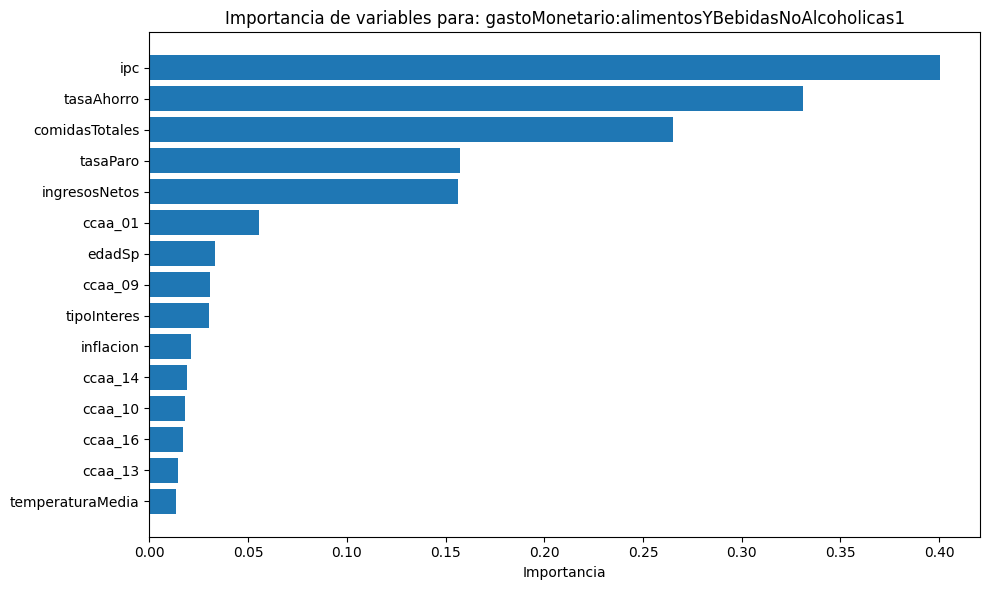

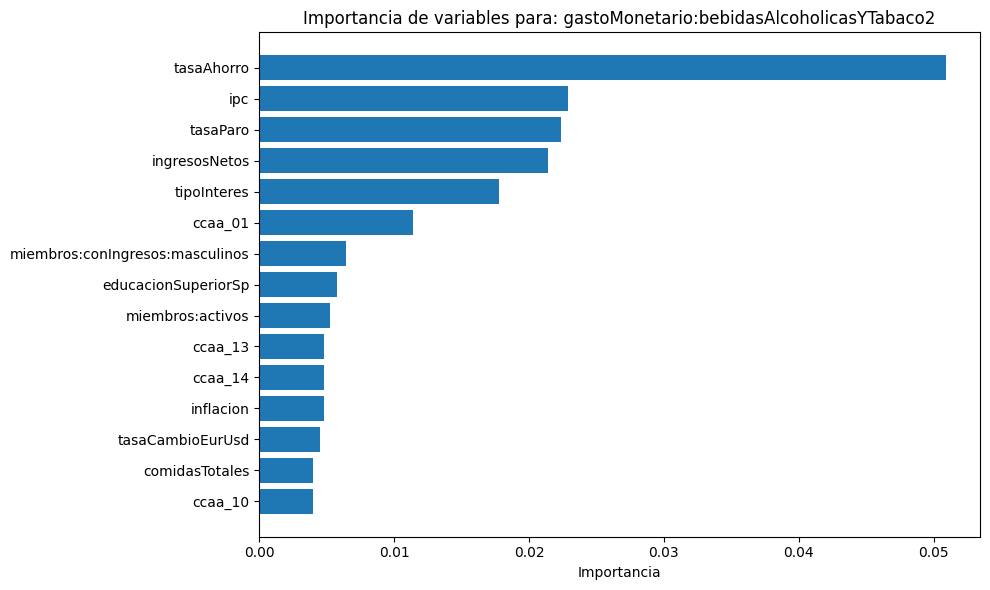

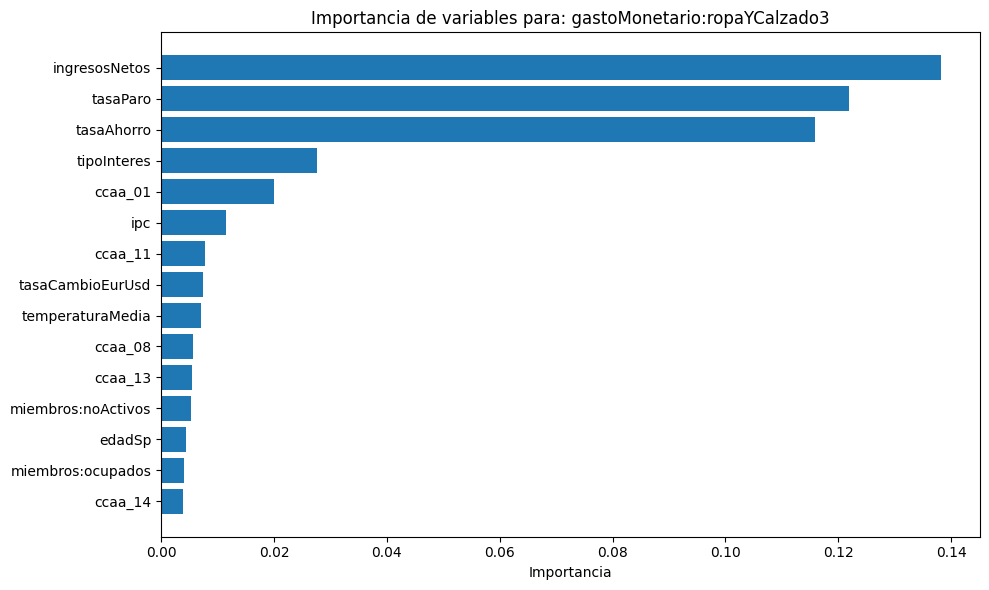

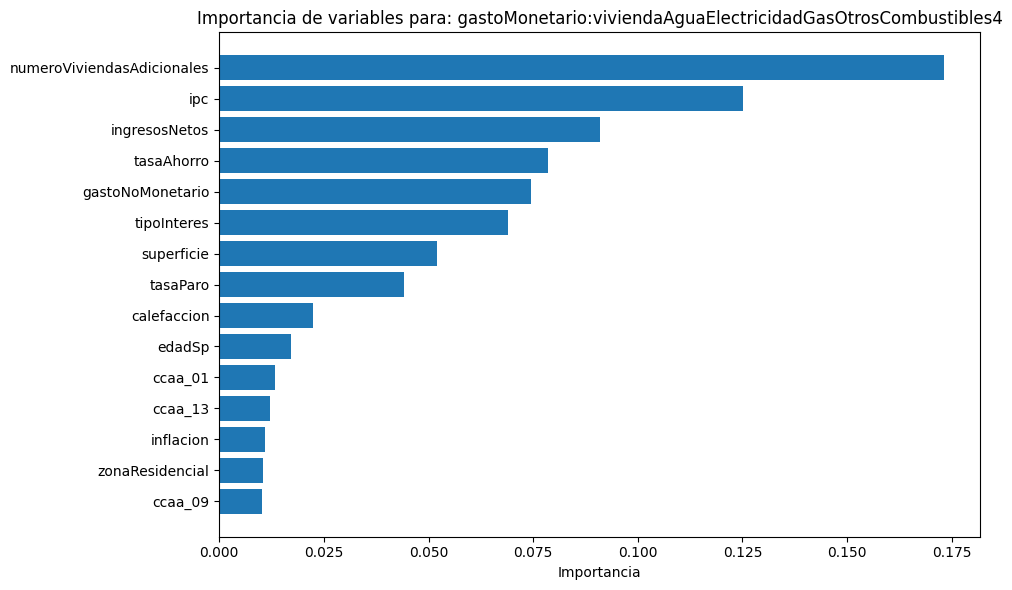

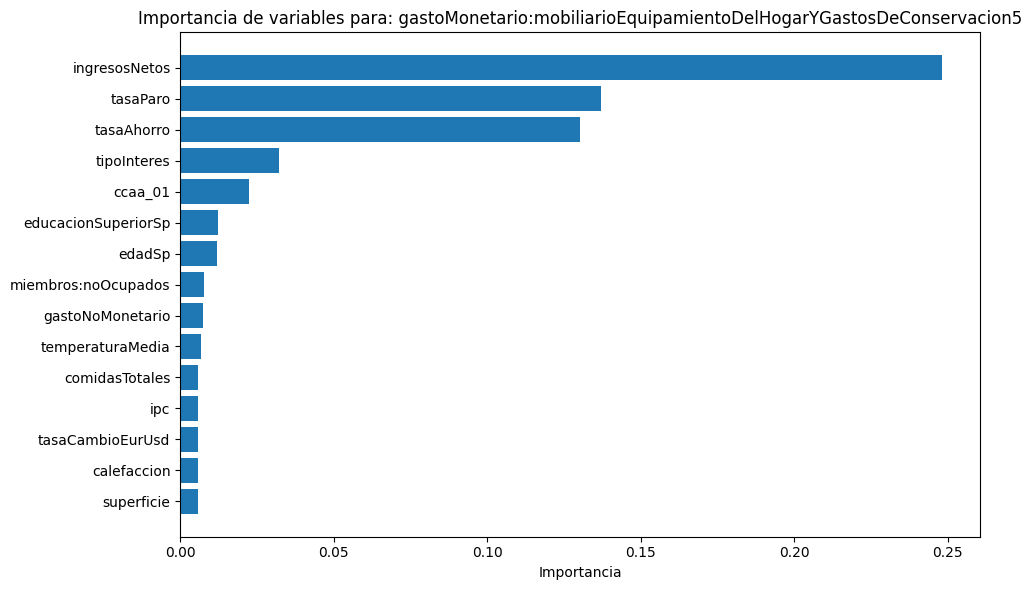

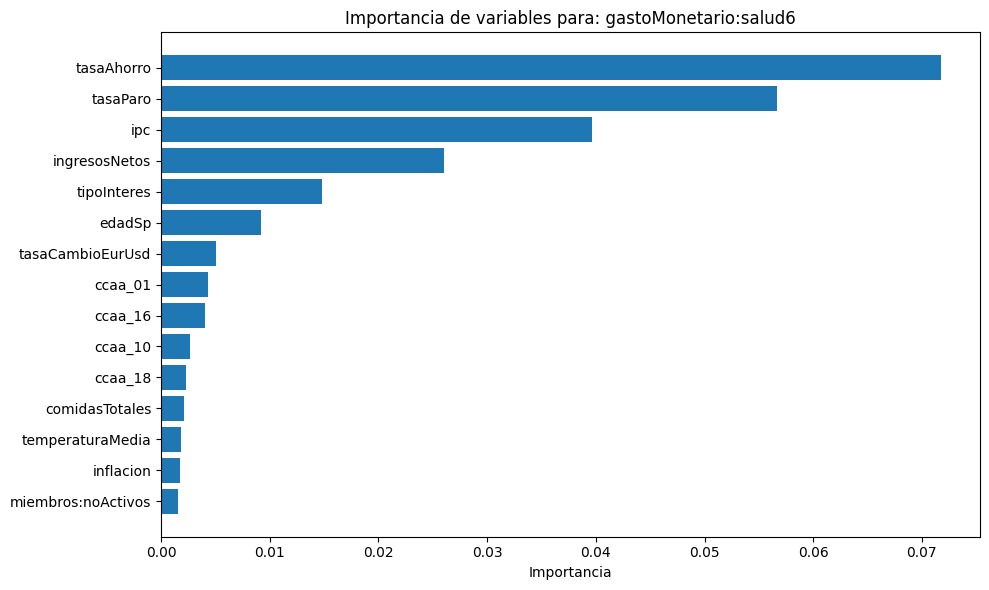

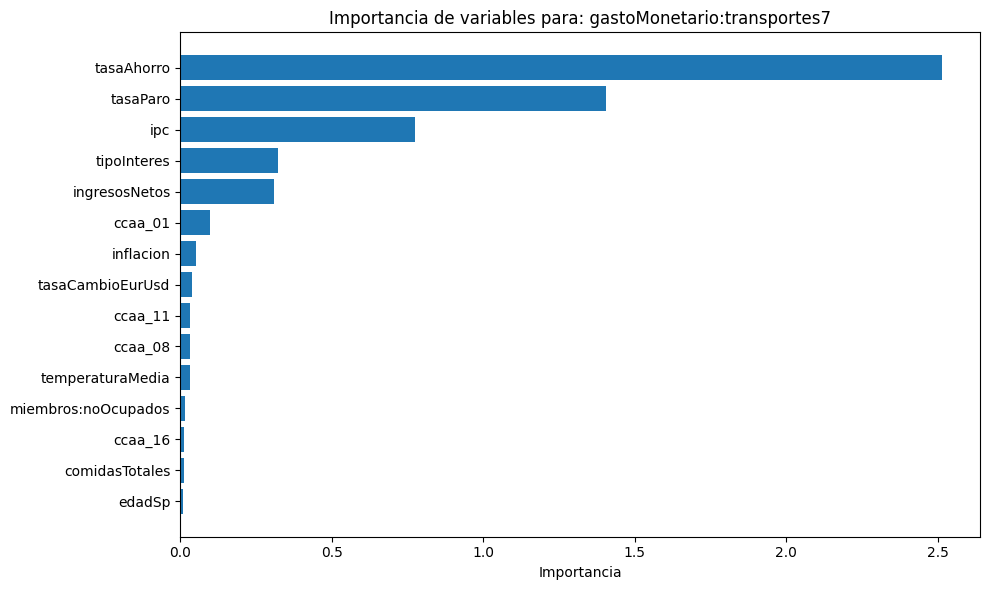

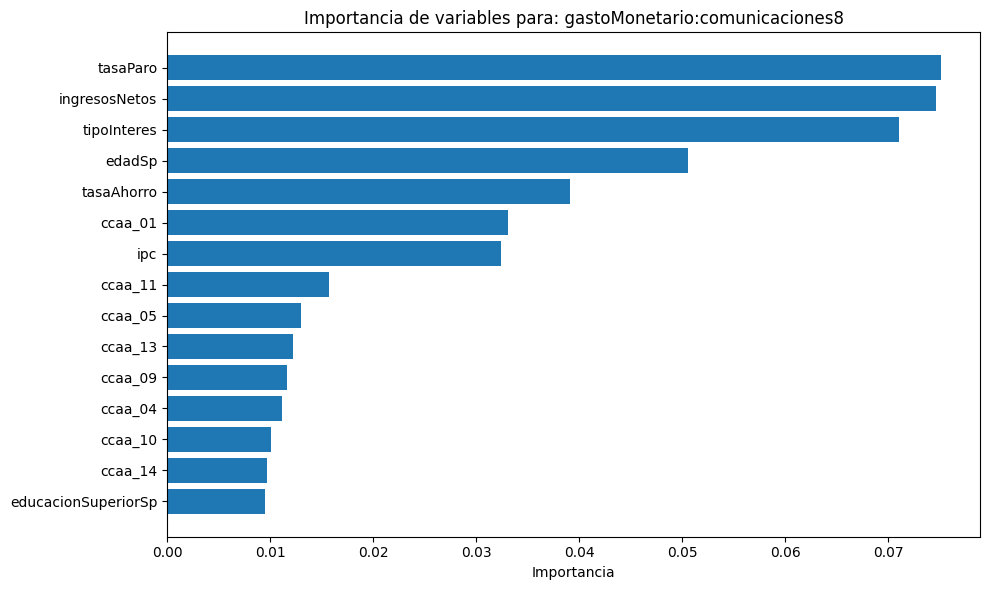

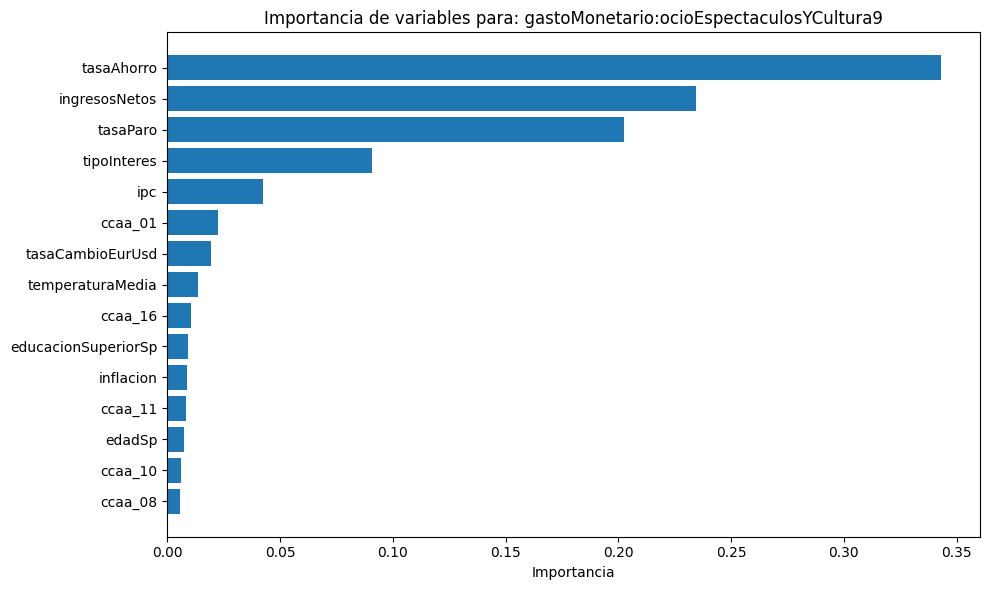

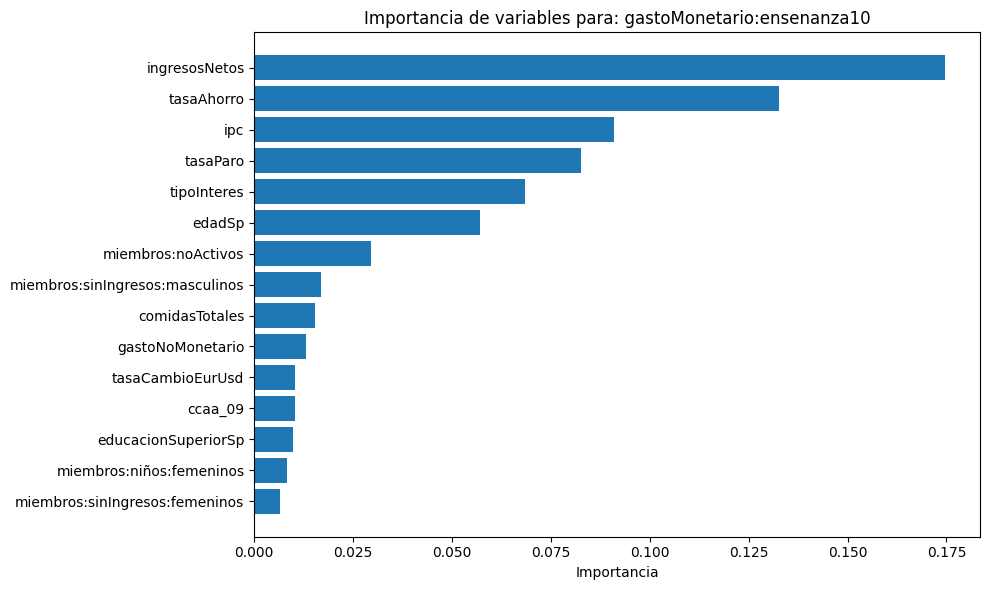

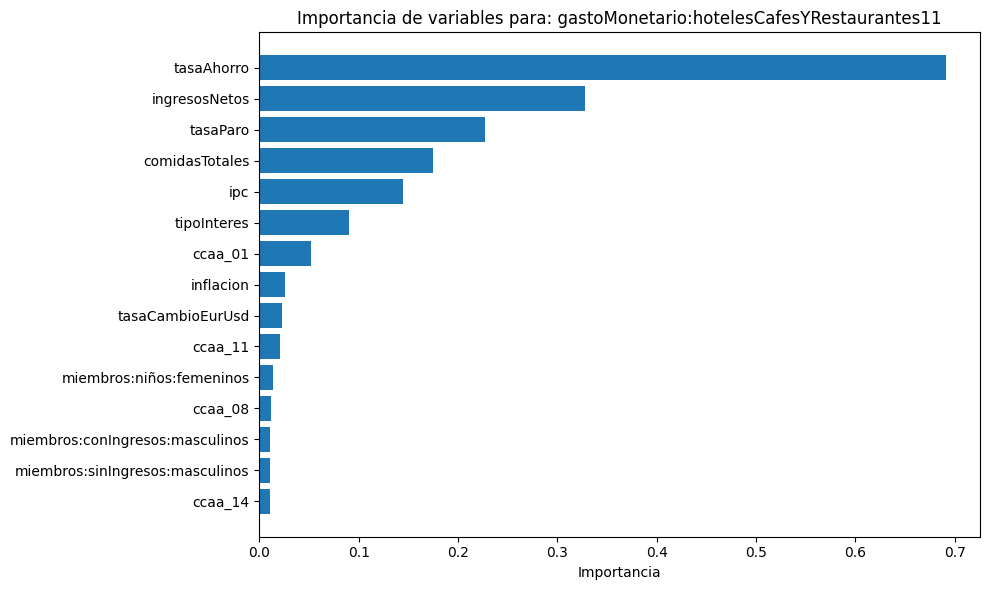

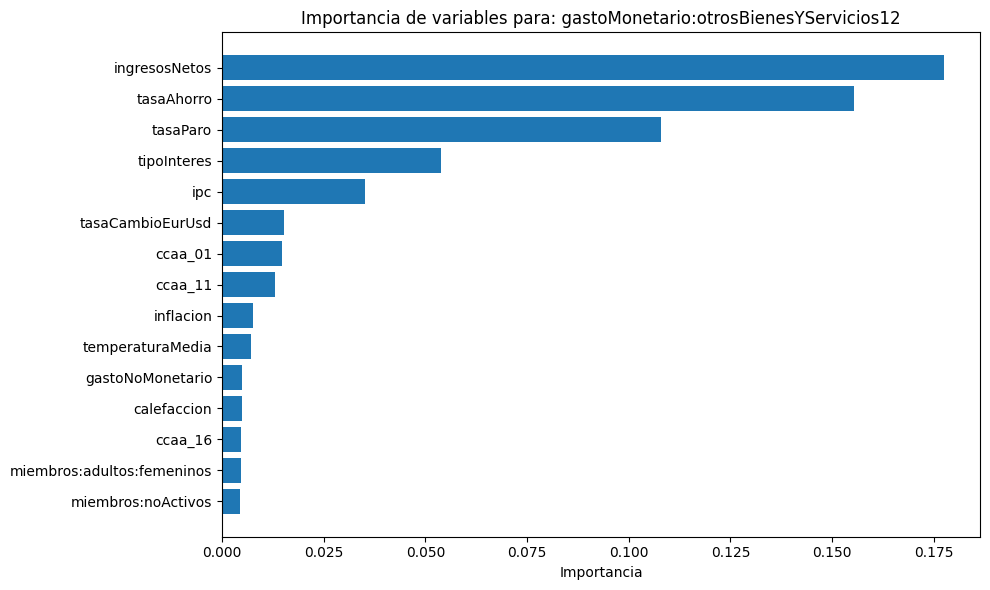

In [14]:
plot_feature_importances_by_target(mlp_importances_df)

In [15]:
# Save the coefficients DataFrame to a TSV file
mlp_importances_df.to_csv("../../datamarts/impotancia_por_categoria_no_lineal.tsv", sep="\t", index=True)

In [16]:
# Save the r2 DataFrame to a CSV file
mlp_r2_df.to_csv("../../datamarts/r2_por_categoria_no_lineal.tsv", sep="\t", index=False)

In [17]:
mlp_importances_df

,Variable,Importance,Target
0,ipc,0.400683,gastoMonetario:alimentosYBebidasNoAlcoholicas1
1,tasaAhorro,0.330961,gastoMonetario:alimentosYBebidasNoAlcoholicas1
2,comidasTotales,0.265053,gastoMonetario:alimentosYBebidasNoAlcoholicas1
3,tasaParo,0.157354,gastoMonetario:alimentosYBebidasNoAlcoholicas1
4,ingresosNetos,0.156218,gastoMonetario:alimentosYBebidasNoAlcoholicas1
...,...,...,...
691,numeroViviendasAdicionales,0.000104,gastoMonetario:otrosBienesYServicios12
692,miembros:adultos:masculinos,0.000024,gastoMonetario:otrosBienesYServicios12
693,ccaa_19,0.000010,gastoMonetario:otrosBienesYServicios12
694,regimenTenencia,-0.000079,gastoMonetario:otrosBienesYServicios12


In [18]:
# ^Pivotear el DataFrame para que cada target tenga su propia columna de importancias
importances_pivoted = mlp_importances_df.pivot(index='Variable', columns='Target', values='Importance').reset_index()
importances_pivoted

Target,Variable,gastoMonetario:alimentosYBebidasNoAlcoholicas1,gastoMonetario:bebidasAlcoholicasYTabaco2,gastoMonetario:comunicaciones8,gastoMonetario:ensenanza10,gastoMonetario:hotelesCafesYRestaurantes11,gastoMonetario:mobiliarioEquipamientoDelHogarYGastosDeConservacion5,gastoMonetario:ocioEspectaculosYCultura9,gastoMonetario:otrosBienesYServicios12,gastoMonetario:ropaYCalzado3,gastoMonetario:salud6,gastoMonetario:transportes7,gastoMonetario:viviendaAguaElectricidadGasOtrosCombustibles4
0,aguaCaliente,0.000167,-0.000135,0.000894,0.000074,0.000160,0.000064,-0.000007,-0.000089,0.000071,0.000109,0.000540,0.000118
1,calefaccion,0.003821,0.000780,0.003653,0.002776,0.005597,0.005717,0.004136,0.004925,0.003411,0.000920,0.001276,0.022308
2,capitalProvincia,0.002655,0.000730,0.001381,0.001278,0.003125,0.002306,0.001290,0.000499,0.000372,0.000093,0.003717,0.008226
3,ccaa_01,0.055669,0.011426,0.033128,0.005322,0.052172,0.022317,0.022725,0.014824,0.019951,0.004321,0.097837,0.013358
4,ccaa_02,0.005877,0.001595,0.005922,0.000937,0.001303,0.000881,0.000749,0.000518,0.000485,0.000308,0.002597,0.002177
5,ccaa_03,0.005162,0.000779,0.003616,-0.000357,0.002752,0.000145,0.000453,0.001145,0.001454,-0.000055,0.003790,0.000816
6,ccaa_04,0.005595,0.000240,0.011133,0.002717,0.001093,0.003582,0.002112,0.000717,0.001123,0.000528,0.003471,0.003009
7,ccaa_05,0.008376,0.002629,0.012951,0.004451,0.004746,0.001998,0.003055,0.002170,0.000291,0.000188,0.009510,0.001415
8,ccaa_06,0.005254,0.000061,0.002074,0.003081,0.002475,-0.000180,0.000274,0.000823,0.000933,0.000329,0.000975,0.002015
9,ccaa_07,0.006561,0.000513,0.005217,0.003231,0.001028,0.000446,0.003297,0.000589,0.000348,0.000068,0.004504,0.002562


### Mapa de calor de los coeficientes por código

In [19]:
import seaborn as sns

In [20]:
import re

def renombrar_columnas_por_codigo(df, ignore_cols=None):
    """
    Renombra las columnas extrayendo el código numérico de su final
    (p. ej. de 'gastoMonetario:alojamiento112' deja '112', etc.),
    pero omite renombrar cualquier columna cuyo nombre esté en ignore_cols.
    
    Parámetros:
    - df: DataFrame de pandas.
    - ignore_cols: lista de nombres de columnas a excluir (por defecto ['variable']).
    """
    if ignore_cols is None:
        ignore_cols = ['Variable']
        
    patron = re.compile(r'(\d+)$')  

    mapping = {}
    
    for col in df.columns:
        if col in ignore_cols:
            continue
        m = patron.search(col)
        if m:
            mapping[col] = m.group(1)
    
    return df.rename(columns=mapping)


In [21]:
importances_pivoted

Target,Variable,gastoMonetario:alimentosYBebidasNoAlcoholicas1,gastoMonetario:bebidasAlcoholicasYTabaco2,gastoMonetario:comunicaciones8,gastoMonetario:ensenanza10,gastoMonetario:hotelesCafesYRestaurantes11,gastoMonetario:mobiliarioEquipamientoDelHogarYGastosDeConservacion5,gastoMonetario:ocioEspectaculosYCultura9,gastoMonetario:otrosBienesYServicios12,gastoMonetario:ropaYCalzado3,gastoMonetario:salud6,gastoMonetario:transportes7,gastoMonetario:viviendaAguaElectricidadGasOtrosCombustibles4
0,aguaCaliente,0.000167,-0.000135,0.000894,0.000074,0.000160,0.000064,-0.000007,-0.000089,0.000071,0.000109,0.000540,0.000118
1,calefaccion,0.003821,0.000780,0.003653,0.002776,0.005597,0.005717,0.004136,0.004925,0.003411,0.000920,0.001276,0.022308
2,capitalProvincia,0.002655,0.000730,0.001381,0.001278,0.003125,0.002306,0.001290,0.000499,0.000372,0.000093,0.003717,0.008226
3,ccaa_01,0.055669,0.011426,0.033128,0.005322,0.052172,0.022317,0.022725,0.014824,0.019951,0.004321,0.097837,0.013358
4,ccaa_02,0.005877,0.001595,0.005922,0.000937,0.001303,0.000881,0.000749,0.000518,0.000485,0.000308,0.002597,0.002177
5,ccaa_03,0.005162,0.000779,0.003616,-0.000357,0.002752,0.000145,0.000453,0.001145,0.001454,-0.000055,0.003790,0.000816
6,ccaa_04,0.005595,0.000240,0.011133,0.002717,0.001093,0.003582,0.002112,0.000717,0.001123,0.000528,0.003471,0.003009
7,ccaa_05,0.008376,0.002629,0.012951,0.004451,0.004746,0.001998,0.003055,0.002170,0.000291,0.000188,0.009510,0.001415
8,ccaa_06,0.005254,0.000061,0.002074,0.003081,0.002475,-0.000180,0.000274,0.000823,0.000933,0.000329,0.000975,0.002015
9,ccaa_07,0.006561,0.000513,0.005217,0.003231,0.001028,0.000446,0.003297,0.000589,0.000348,0.000068,0.004504,0.002562


In [22]:
def generar_mapa_calor_importancias(df, figsize=(22, 14), vmax=0.05, output_path=None):
    """
    Genera un mapa de calor con las columnas (códigos de gasto) ordenadas numéricamente.
    
    Args:
        df (pd.DataFrame): DataFrame con variables como filas y categorías como columnas.
        figsize (tuple): Tamaño de la figura.
        vmax (float): Valor máximo para la escala de color.
        output_path (str): Ruta opcional para guardar el mapa.
    """
    df_codificado = renombrar_columnas_por_codigo(df.copy())
    data = df_codificado.drop(columns=["Target", "Variable"], errors="ignore")
    data.index = df_codificado["Variable"] if "Variable" in df_codificado.columns else df_codificado.index

    # Reordenar columnas por valor numérico del código
    columnas_ordenadas = sorted(data.columns, key=lambda x: float(x.replace("_", ".")))
    data = data[columnas_ordenadas]

    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        data,
        cmap="Reds",
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        linecolor="gray",
        vmin=0,
        vmax=vmax,
        cbar_kws={"label": "Importancia relativa"}
    )

    plt.title("Mapa de calor de importancias por variable y categoría de gasto", fontsize=14)
    plt.xlabel("Código de Categoría de Gasto")
    plt.ylabel("Variable")
    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=300)
    plt.show()

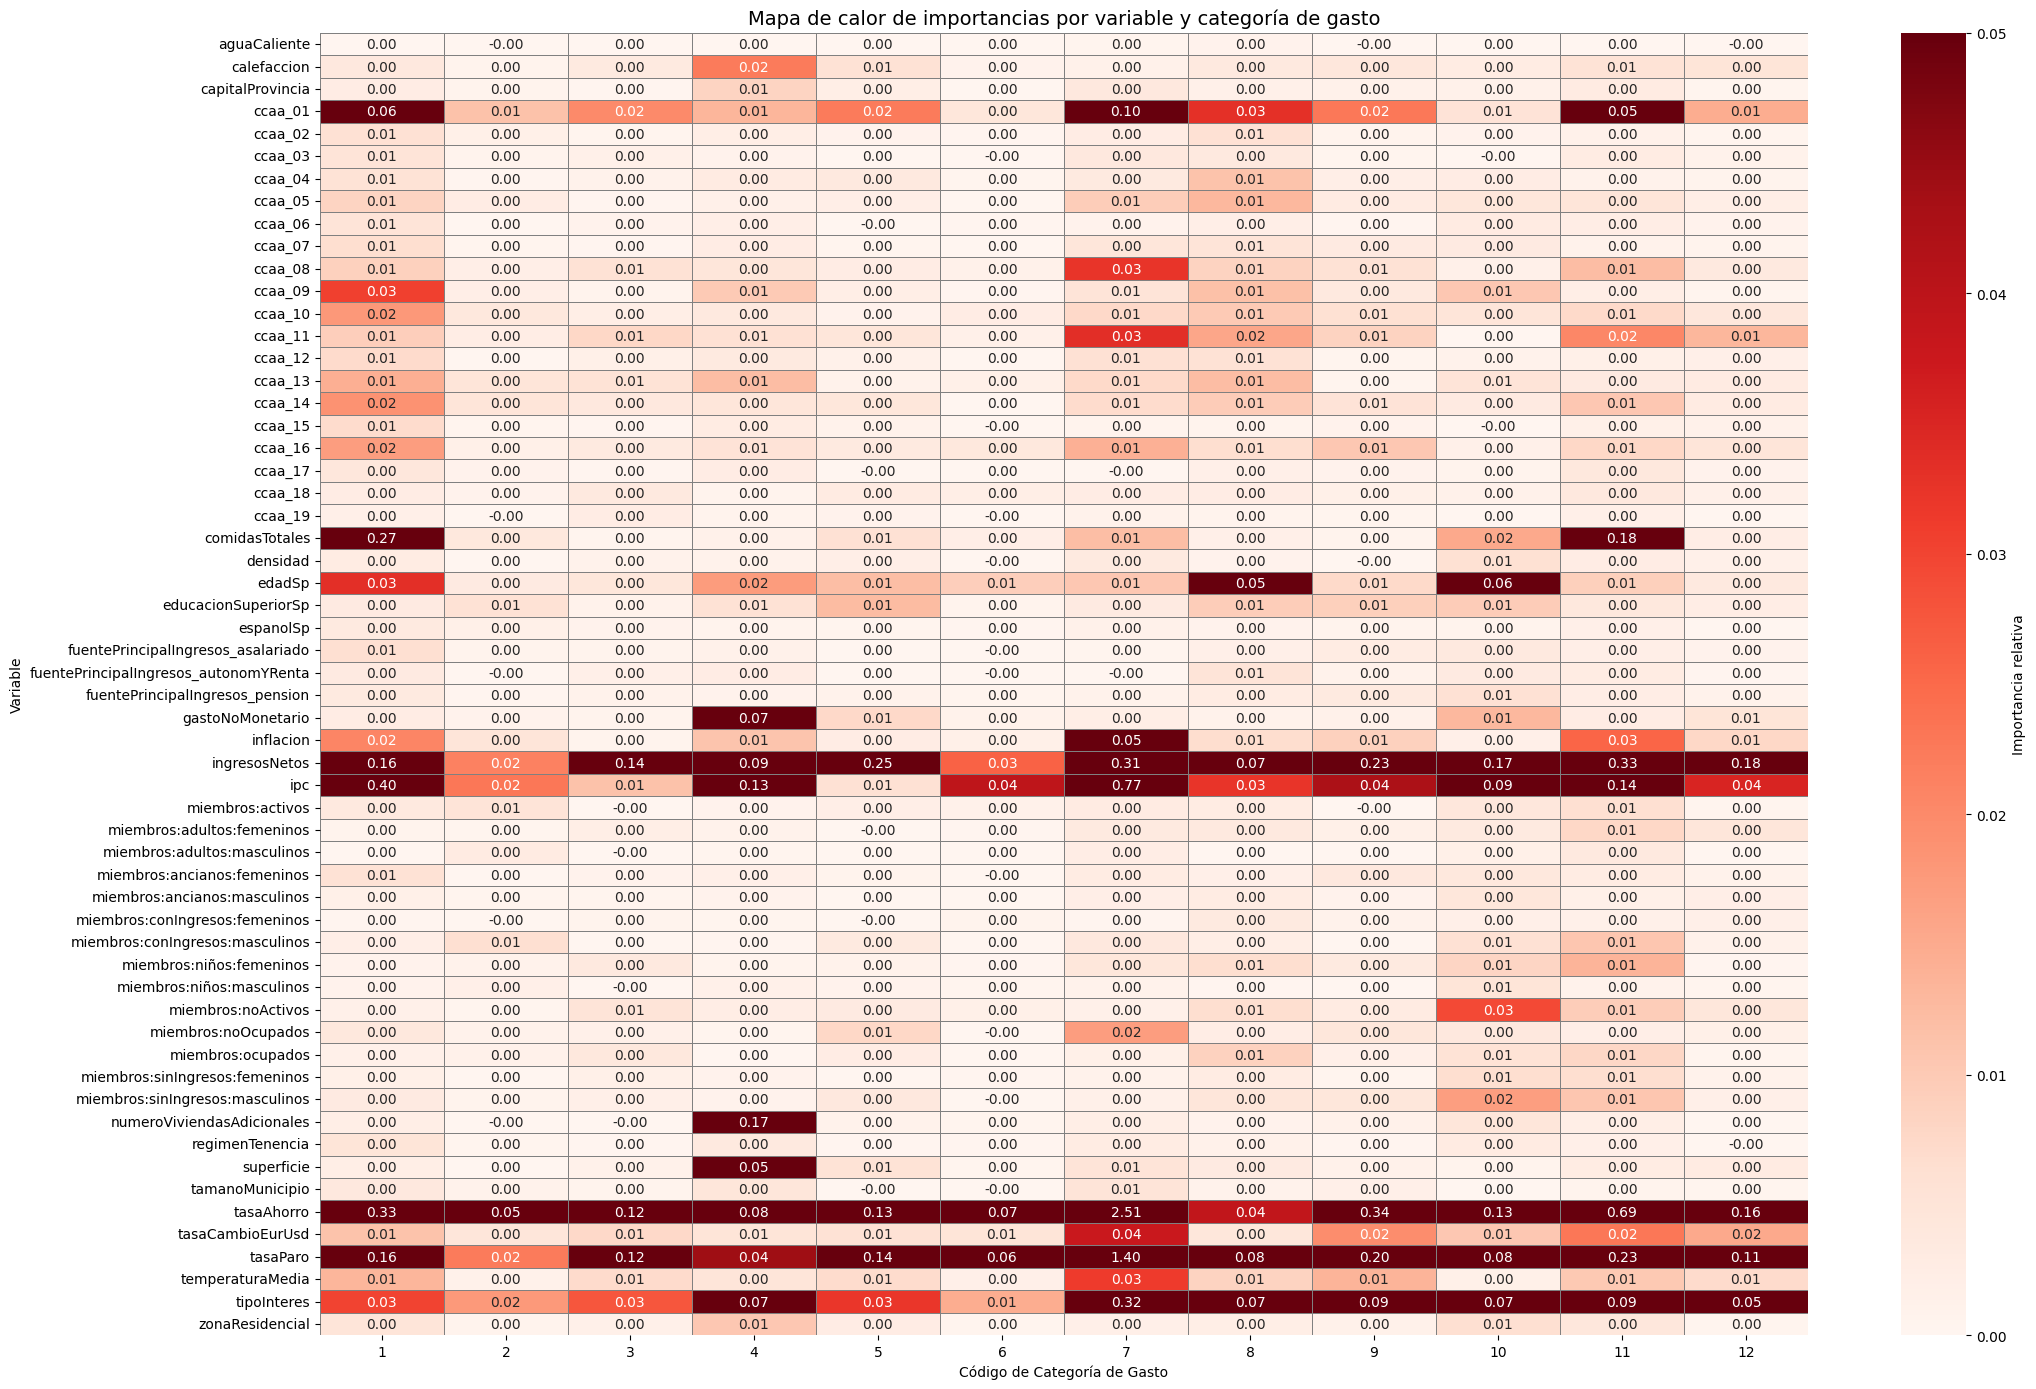

In [23]:
generar_mapa_calor_importancias(importances_pivoted)